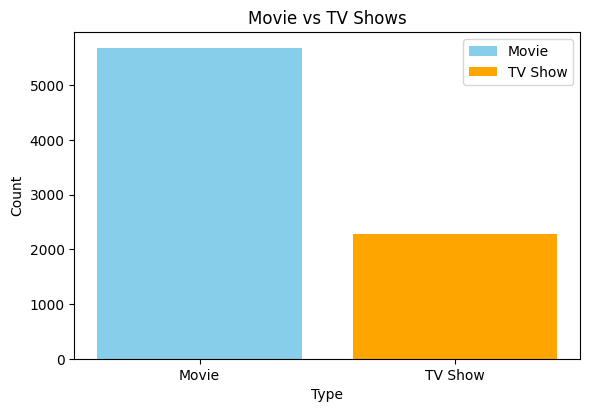

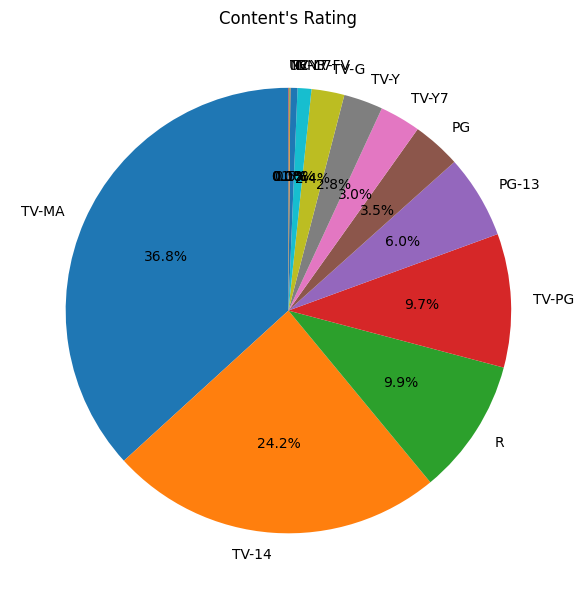

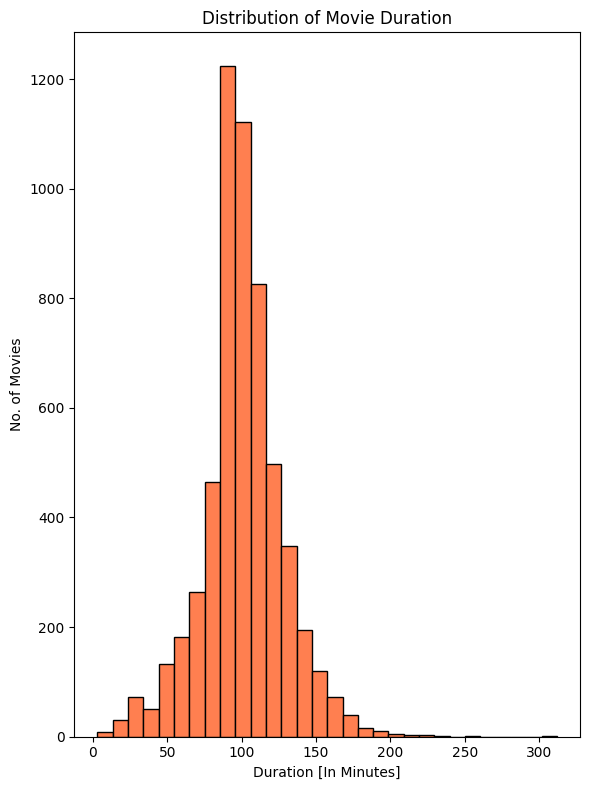

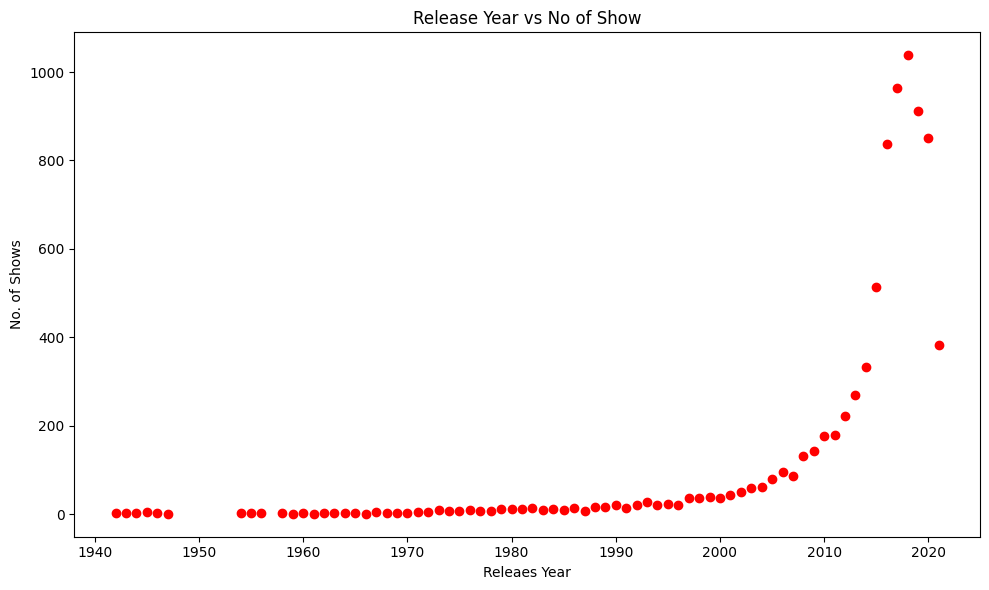

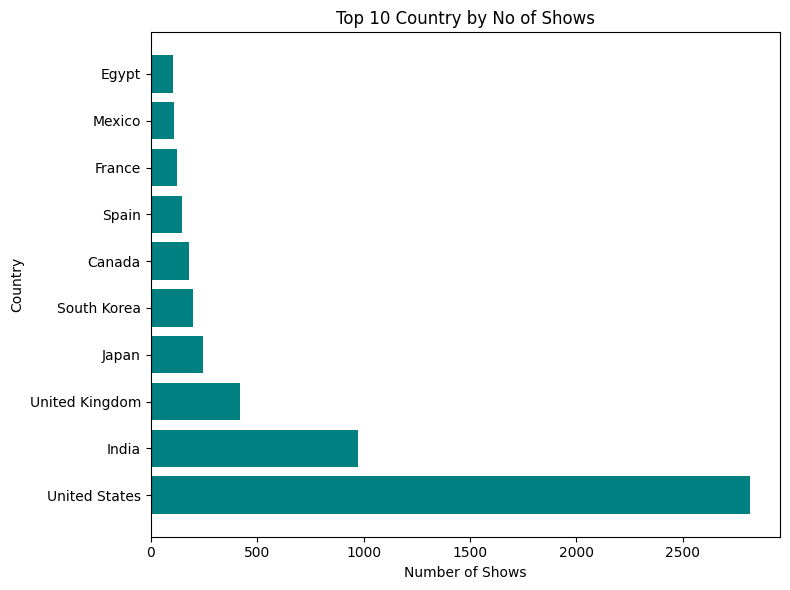

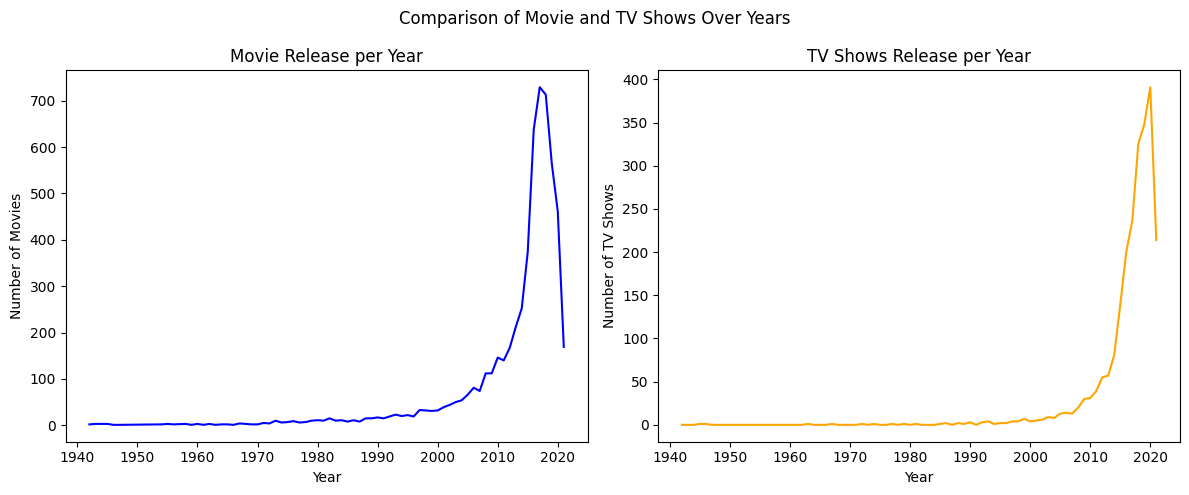

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r'E:\Code\Python\Libraries\Matplotlib\netflix_titles.csv')

df = df.dropna(subset=['type' , 'release_year' , 'rating', 'country', 'duration'])


# Movie vs TV Shows (Bar Chart)
type_counts= df['type'].value_counts()
plt.figure(figsize=(6 , 4))
plt.bar(type_counts.index, type_counts.to_numpy(), color=['skyblue', 'orange'], label=['Movie' , 'TV Show'])
plt.xlabel('Type')
plt.ylabel('Count')
plt.tight_layout()
plt.title('Movie vs TV Shows')
plt.legend(loc='upper right')
plt.savefig('Movies vs Tv Shows .png', dpi=300, bbox_inches='tight')
plt.show()

# Content Rating (Pie Chart)
rating_counts= df['rating'].value_counts()
plt.figure(figsize=(6,8))
plt.pie(rating_counts, labels=rating_counts.index.tolist(), autopct='%1.1f%%', startangle=90)
plt.title("Content's Rating")
plt.tight_layout()
plt.savefig('Content_Rating_pie .png', dpi=300, bbox_inches='tight')
plt.show()

# Movie Duration (Histogram)
movie_df=df[df['type'] == 'Movie'].copy()
movie_df['duration_int'] = movie_df['duration'].str.replace('min','').astype(int)
plt.figure(figsize=(6,8))
plt.hist(movie_df['duration_int'], bins=30, color='coral', edgecolor='black')
plt.title('Distribution of Movie Duration')
plt.xlabel('Duration [In Minutes]')
plt.ylabel('No. of Movies')
plt.tight_layout()
plt.savefig('Movie_Duration_Histogram.png', dpi=300, bbox_inches='tight')
plt.show()

release_counts=df['release_year'].value_counts().sort_index()
plt.figure(figsize=(10,6))
plt.scatter(release_counts.index, release_counts.values.tolist(), color='red' )
plt.title('Release Year vs No of Show')
plt.xlabel('Releaes Year')
plt.ylabel('No. of Shows')
plt.tight_layout()
plt.savefig('Release_Year_Scatter.png', dpi=300, bbox_inches='tight')
plt.show()

country_counts=df['country'].value_counts().head(10)
plt.figure(figsize=(8,6))
plt.barh(country_counts.index, country_counts.values.tolist(), color='teal')
plt.title('Top 10 Country by No of Shows')
plt.xlabel('Number of Shows')
plt.ylabel('Country')
plt.tight_layout()
plt.savefig('Top_10_Country_barh.png', dpi=300, bbox_inches='tight')
plt.show()

content_by_year=df.groupby(['release_year', 'type']).size().unstack().fillna(0)
fig, ax = plt.subplots(1,2, figsize=(12,5))

# First subplot:Movies
ax[0].plot(content_by_year.index, content_by_year['Movie'], color='blue')
ax[0].set_title('Movie Release per Year')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Number of Movies')    

# First subplot:Movies
ax[1].plot(content_by_year.index, content_by_year['TV Show'], color='orange')
ax[1].set_title('TV Shows Release per Year')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Number of TV Shows')    

fig.suptitle('Comparison of Movie and TV Shows Over Years')
plt.tight_layout()
plt.savefig('Movie_TVShows_Comparison_Subplot.png', dpi=300, bbox_inches='tight')
plt.show()

